
### 1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data without predefined output values. Clustering and dimensionality reduction are common examples.

---

### 2. How does K-Means clustering algorithm work?
- Initialize `k` cluster centroids randomly.
- Assign each data point to the nearest centroid.
- Recalculate centroids as the mean of all points in the cluster.
- Repeat until centroids no longer change (convergence).

---

### 3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree like diagram showing how clusters are merged or split step by step in hierarchical clustering. It helps visualize cluster relationships and choose the number of clusters.

---

### 4. What is the main difference between K-Means and Hierarchical Clustering?
- **K-Means** requires specifying the number of clusters in advance; it partitions data.
- **Hierarchical clustering** builds a hierarchy of clusters and doesn't require specifying clusters initially.

---

### 5. What are the advantages of DBSCAN over K-Means?
- Detects clusters of arbitrary shapes.
- Automatically identifies noise points.
- Doesn't require specifying number of clusters.
- Handles outliers effectively.

---

### 6. When would you use Silhouette Score in clustering?
The Silhouette Score is used to evaluate clustering quality it measures how similar a point is to its own cluster compared to others. Used to choose the optimal number of clusters.

---

### 7. What are the limitations of Hierarchical Clustering?
- Computationally expensive (O(n²) time).
- Sensitive to noise and outliers.
- Hard to undo wrong merges/splits once made.

---

### 8. Why is feature scaling important in clustering algorithms like K-Means?
K-Means uses distance (Euclidean). Without scaling, features with large ranges dominate distance computation, leading to biased clusters.

---

### 9. How does DBSCAN identify noise points?
Points that are not part of any dense region (i.e., have fewer than 'minPts' neighbors within radius 'eps') are labeled as **noise (outliers)**.

---

### 10. Define inertia in the context of K-Means.
Inertia measures how internally coherent clusters are — it’s the sum of squared distances between data points and their respective cluster centroids. Lower inertia = tighter clusters.

---

### 11. What is the elbow method in K-Means clustering?
The elbow method plots inertia vs. number of clusters (k). The "elbow point" (where inertia stops decreasing sharply) indicates an optimal `k`.

---

### 12. Describe the concept of "density" in DBSCAN.
Density refers to the number of data points within a specified radius (`eps`). Regions with high density form clusters; sparse regions are noise.

---

### 13. Can hierarchical clustering be used on categorical data?
Yes, but it requires a suitable distance metric (e.g., Hamming distance) or conversion of categorical variables to numeric form.

---

### 14. What does a negative Silhouette Score indicate?
A negative score means the sample is likely assigned to the wrong cluster it’s closer to another cluster than its own.

---

### 15. Explain the term "linkage criteria" in hierarchical clustering.
Linkage criteria determine how the distance between clusters is calculated:
- **Single linkage** – minimum distance between points.
- **Complete linkage** – maximum distance.
- **Average linkage** – mean distance.
- **Ward linkage** – minimizes variance within clusters.

---

### 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
Because K-Means assumes clusters are spherical and of similar size/density. It fails when clusters differ significantly or overlap.

---

### 17. What are the core parameters in DBSCAN, and how do they influence clustering?
- **eps (ε):** Radius of neighborhood.
- **minPts:** Minimum number of points required to form a dense region.
These control cluster tightness and noise detection.

---

### 18. How does K-Means++ improve upon standard K-Means initialization?
K-Means++ selects initial centroids more strategically spreading them apart which leads to faster convergence and better clustering accuracy.

---

### 19. What is agglomerative clustering?
It's a **bottom-up** approach to hierarchical clustering where each data point starts as its own cluster, and pairs of clusters are merged iteratively based on similarity.

---

### 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
Silhouette Score considers both **intra-cluster cohesion** and **inter-cluster separation**, while inertia only measures compactness. Hence, Silhouette is more comprehensive for quality assessment.

---




---



---

Practical Questions:

---
---

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Helper for plotting
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(title)
    plt.show()

iris = load_iris()
agg = AgglomerativeClustering(n_clusters=3)
iris_labels = agg.fit_predict(iris.data)
print("First 10 Predicted Labels:", iris_labels[:10])

First 10 Predicted Labels: [1 1 1 1 1 1 1 1 1 1]




---
 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels


In [5]:
iris = load_iris()
agg = AgglomerativeClustering(n_clusters=3)
iris_labels = agg.fit_predict(iris.data)
print("First 10 Predicted Labels:", iris_labels[:10])

First 10 Predicted Labels: [1 1 1 1 1 1 1 1 1 1]




---
23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot


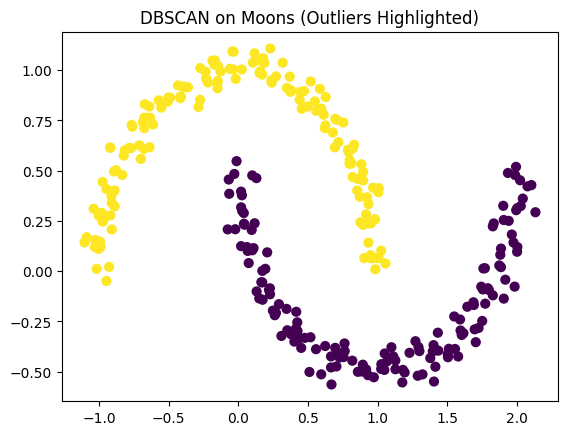

In [6]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
plot_clusters(X, db.labels_, "DBSCAN on Moons (Outliers Highlighted)")


---

24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster

In [7]:
wine = load_wine()
X_scaled = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

Cluster Sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}




---

25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

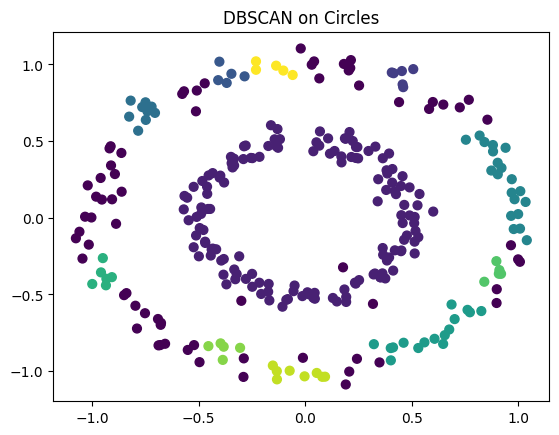

In [8]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
plot_clusters(X, db.labels_, "DBSCAN on Circles")




---

26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids

In [9]:
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]




---

27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN


In [ ]:
X, _ = make_blobs(n_samples=400, cluster_std=[0.5, 1.5, 0.3, 0.8], centers=4, random_state=42)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
plot_clusters(X, db.labels_, "DBSCAN with Varying Densities")

28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

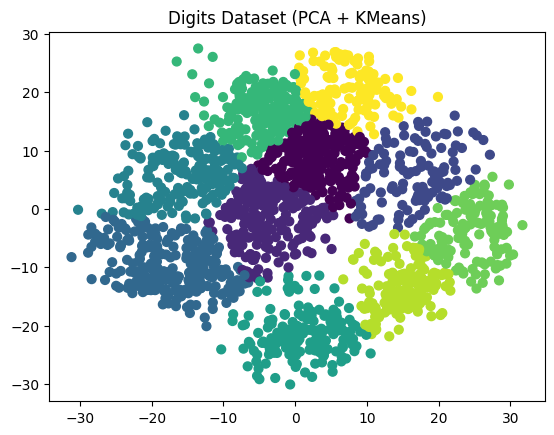

In [10]:
digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
plot_clusters(X_pca, kmeans.labels_, "Digits Dataset (PCA + KMeans)")

29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

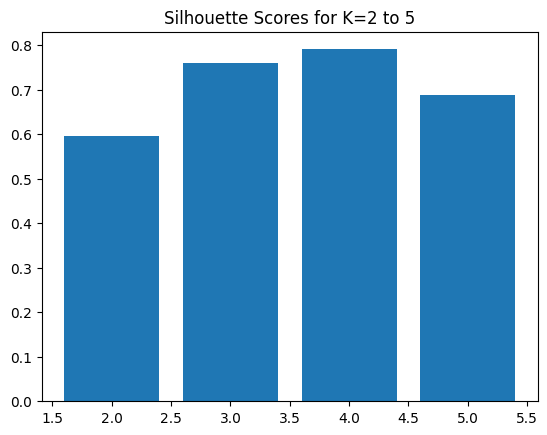

In [11]:
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    scores.append(silhouette_score(X, labels))
plt.bar(range(2, 6), scores)
plt.title("Silhouette Scores for K=2 to 5")
plt.show()

30.
 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

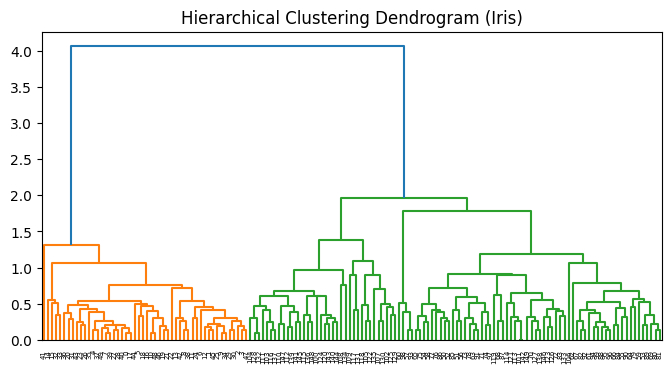

In [12]:
Z = linkage(iris.data, method='average')
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.show()

31.  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries

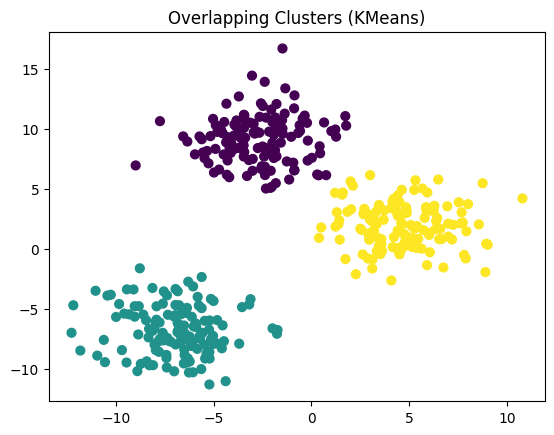

In [13]:
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=2.0, random_state=42)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
plot_clusters(X, labels, "Overlapping Clusters (KMeans)")

32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

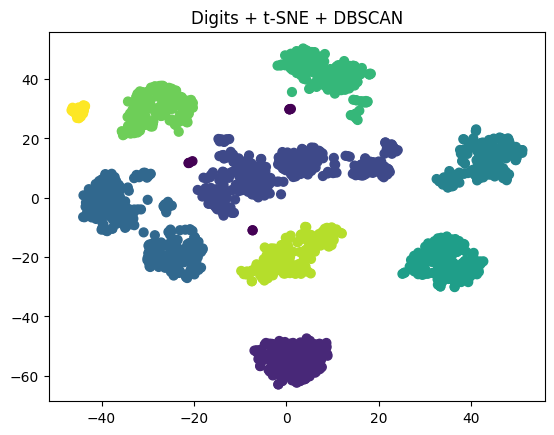

In [14]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)
plot_clusters(X_tsne, db.labels_, "Digits + t-SNE + DBSCAN")

33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result

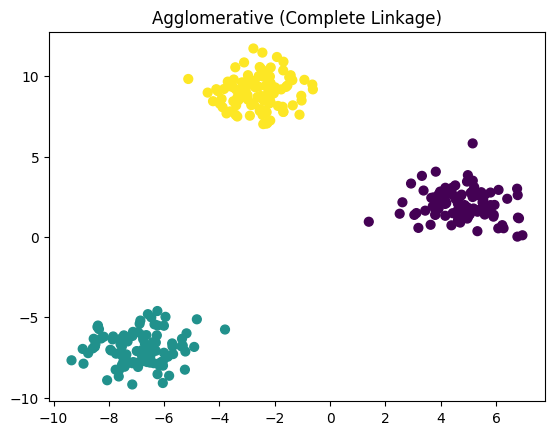

In [15]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)
plot_clusters(X, labels, "Agglomerative (Complete Linkage)")

34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot

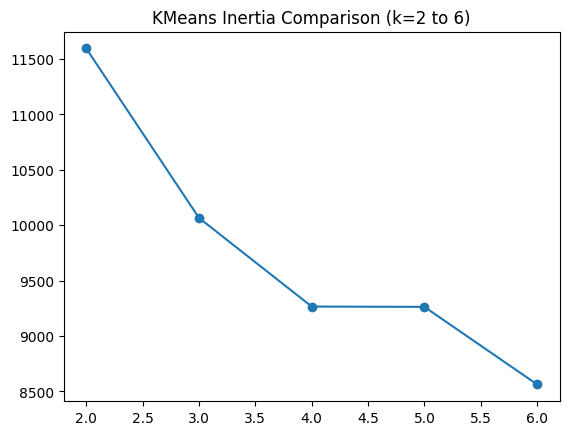

In [16]:
X = load_breast_cancer().data
X_scaled = StandardScaler().fit_transform(X)
inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertias.append(km.inertia_)
plt.plot(range(2, 7), inertias, marker='o')
plt.title("KMeans Inertia Comparison (k=2 to 6)")
plt.show()

35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage

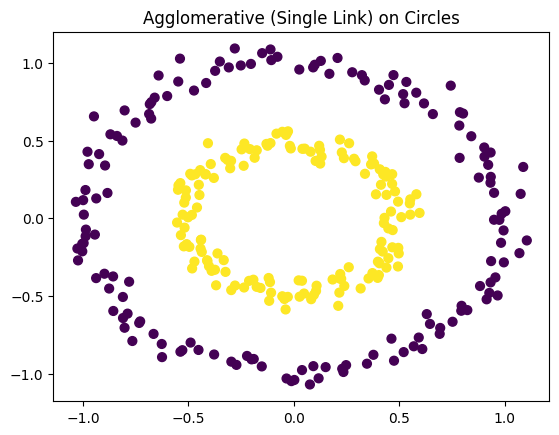

In [17]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)
plot_clusters(X, labels, "Agglomerative (Single Link) on Circles")

36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise)


In [18]:
X = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=1.5, min_samples=5).fit(X)
unique_labels = set(db.labels_) - {-1}
print("Number of clusters (excluding noise):", len(unique_labels))

Number of clusters (excluding noise): 0


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points

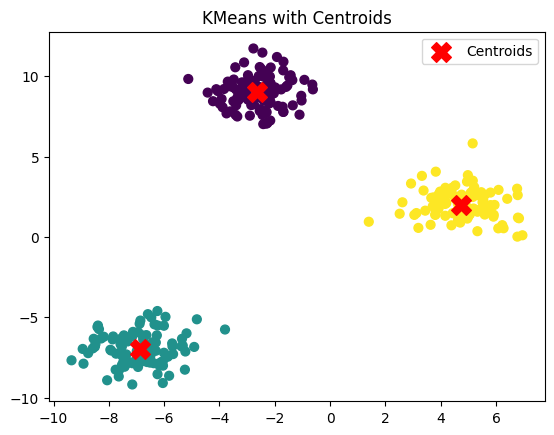

In [19]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("KMeans with Centroids")
plt.show()

38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [20]:
db = DBSCAN(eps=0.8, min_samples=5).fit(iris.data)
print("Noise Samples:", np.sum(db.labels_ == -1))

Noise Samples: 2


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result

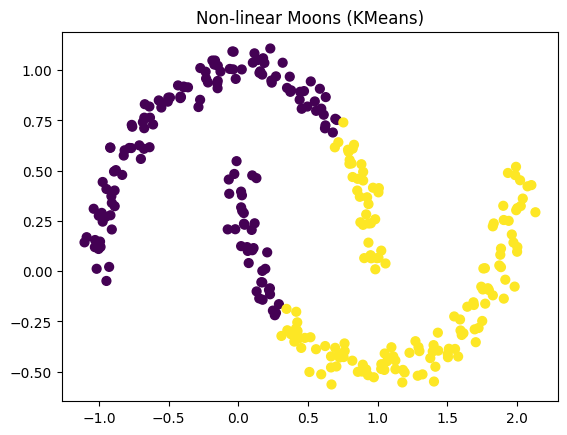

In [21]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
plot_clusters(X, kmeans.labels_, "Non-linear Moons (KMeans)")

40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

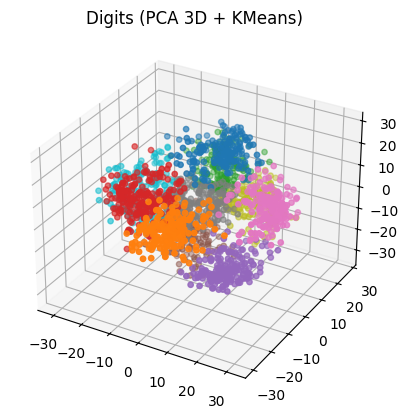

In [22]:
from mpl_toolkits.mplot3d import Axes3D
X_pca = PCA(n_components=3).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=kmeans.labels_, cmap='tab10', s=15)
plt.title("Digits (PCA 3D + KMeans)")
plt.show()

41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering/

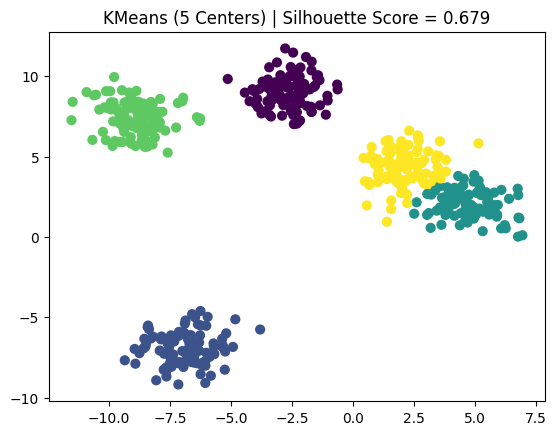

In [23]:
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
plot_clusters(X, labels, f"KMeans (5 Centers) | Silhouette Score = {score:.3f}")

42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D

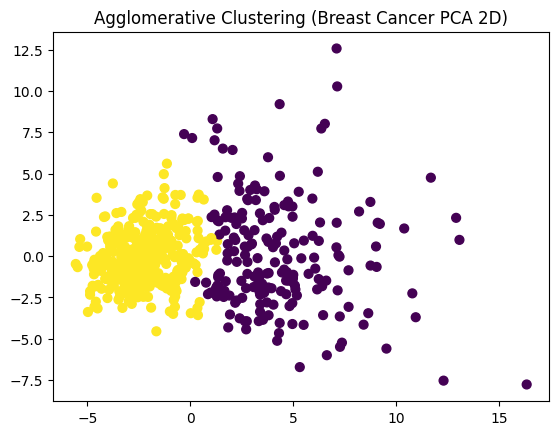

In [24]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)
plot_clusters(X_pca, labels, "Agglomerative Clustering (Breast Cancer PCA 2D)")

43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

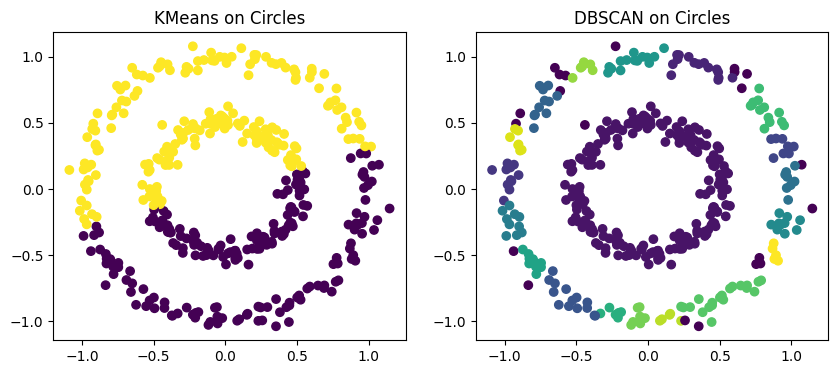

In [26]:
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)
db_labels = DBSCAN(eps=0.1, min_samples=5).fit_predict(X)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title("KMeans on Circles")
ax[1].scatter(X[:, 0], X[:, 1], c=db_labels, cmap='viridis')
ax[1].set_title("DBSCAN on Circles")
plt.show()

44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

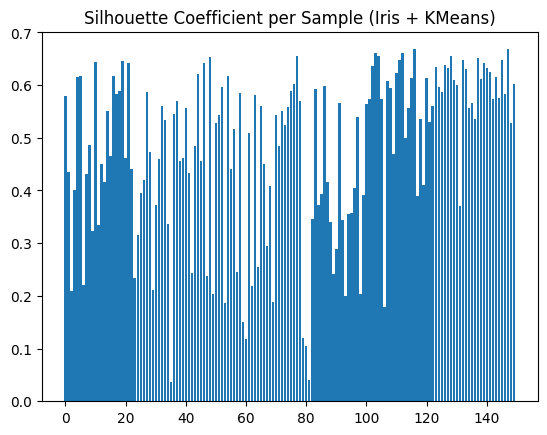

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
sample_sil = silhouette_samples(X, labels)
plt.bar(range(len(sample_sil)), sample_sil)
plt.title("Silhouette Coefficient per Sample (Iris + KMeans)")
plt.show()

45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters

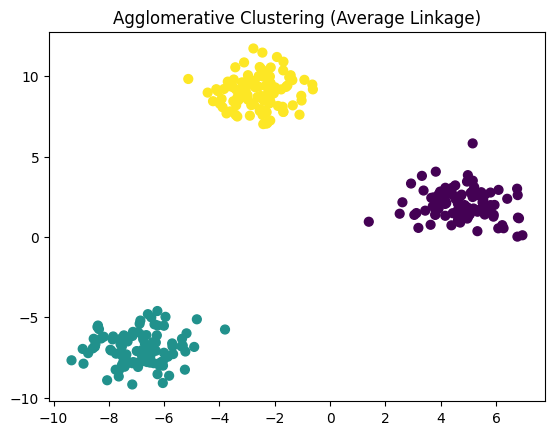

In [29]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)
plot_clusters(X, labels, "Agglomerative Clustering (Average Linkage)")

46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)

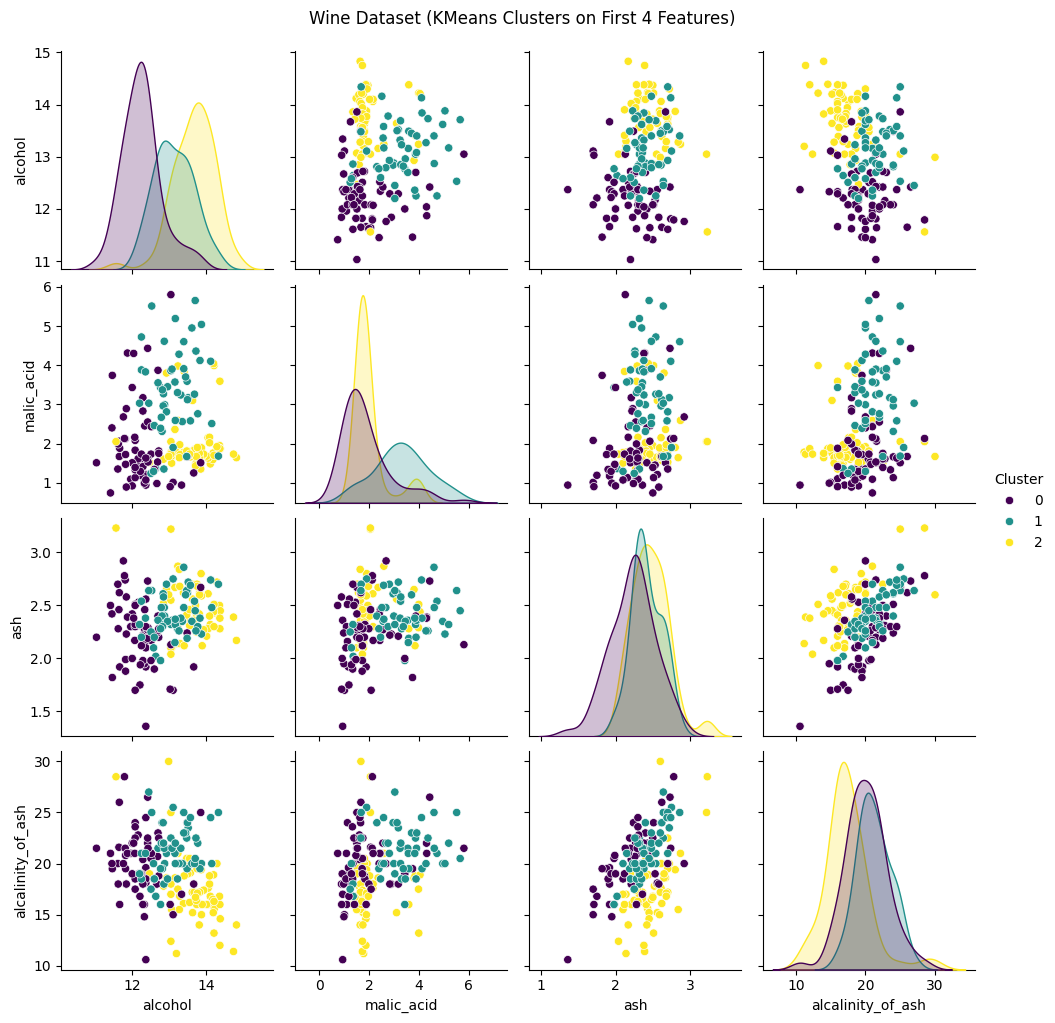

In [32]:
import seaborn as sns
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
df['Cluster'] = labels
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("Wine Dataset (KMeans Clusters on First 4 Features)", y=1.02)
plt.show()

47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

Clusters Found: 4, Noise Points: 53


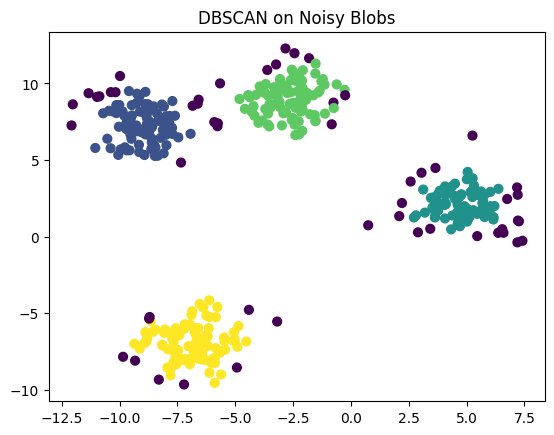

In [33]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)
db = DBSCAN(eps=0.7, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print(f"Clusters Found: {n_clusters}, Noise Points: {n_noise}")
plot_clusters(X, labels, "DBSCAN on Noisy Blobs")

48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters

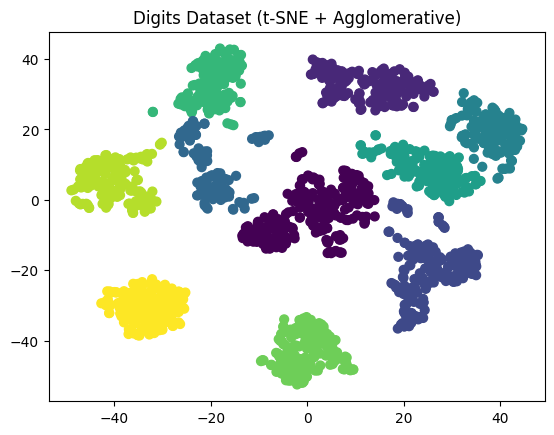

In [34]:
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)
plot_clusters(X_tsne, labels, "Digits Dataset (t-SNE + Agglomerative)")



---



---
##END....
---



---



